In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os
from glob import glob
import wget
import requests
import netCDF4 as nc4

# clean

In [2]:
lat_min = -25
lat_max = -2
lon_min = -61
lon_max = -42
date_start= '1981-01-01'
date_end = '2020-12-31'
dataset = 'era5'


In [17]:
# Specify the path to the folder containing the NetCDF files
folder_path_h = r"E:\Veranico_HD\raw_datasets\era5\era5_h"
folder_path = r"E:\Veranico_HD\raw_datasets\era5\\"

# Open and concatenate all the NetCDF files
for ii in os.listdir(folder_path_h):
    ds = xr.open_dataset(os.path.join(folder_path_h, ii ))
    ds = ds.rename({'latitude': 'lat', 'longitude': 'lon'})
    ds = ds.rename({'tp': 'pr'}).sortby('lat')
    ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max), time=slice(date_start, date_end))
    #to daily values
    ds = ds.resample(time='1D').sum()
    ds.to_netcdf((folder_path + ii ))
    print(ii)


era00.nc
era10.nc
era80.nc
era90.nc


In [18]:
ds = xr.open_mfdataset(os.path.join(folder_path, '*.nc'), combine='by_coords')
ds.to_netcdf(r'E:\Veranico_HD\clean_cerrado\\' + dataset + '.nc')

In [37]:
# CDD
from funcs import *
ds = xr.open_dataset(r'E:\Veranico_HD\clean_cerrado\\' + dataset + '.nc')
ds['pr'] = ds.pr * 1000
cdd = cdd_numba(ds.pr)
cdd.to_netcdf(r"D:\GU\IC\Veranico\daily_datasets\CDD\\" + dataset + '.nc')

d:\GU\IC\Veranico\funcs.py:25: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  daa = xr.apply_ufunc(


In [3]:
ds = xr.open_dataset(r'E:\Veranico_HD\clean_cerrado\\' + dataset + '.nc')


# EDA

In [38]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [39]:
regions = gpd.read_file(r"D:\GU\IC\Scripts\Data\regions1.geojson")
mm = cdd.where(cdd > 5).mean(dim='time')


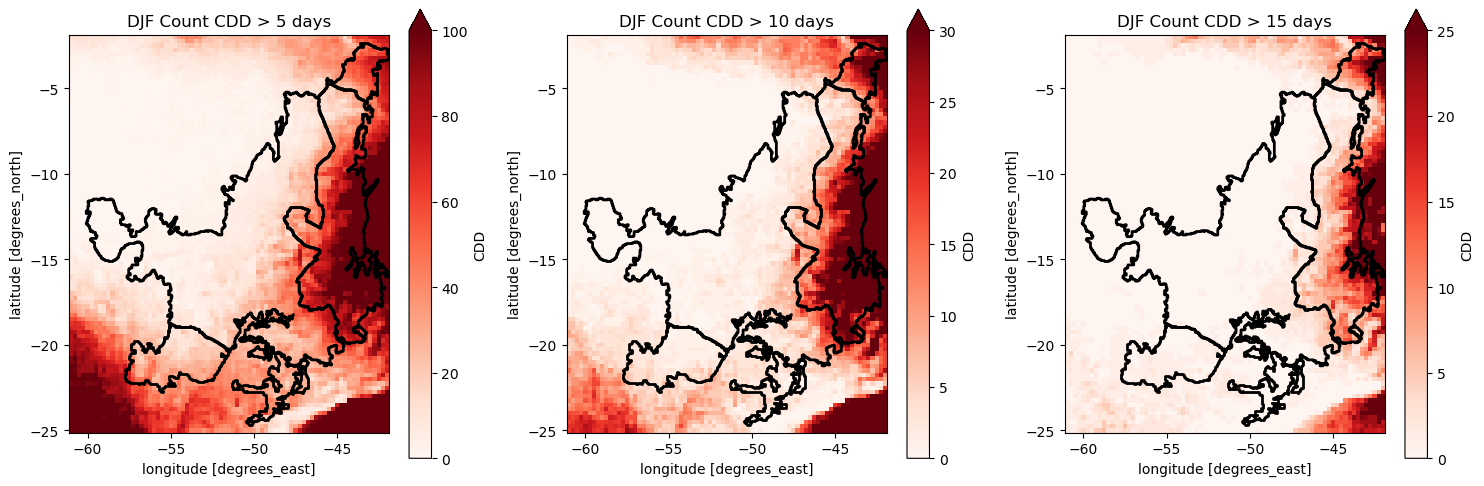

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 5).count(dim='time').plot(ax=axs[0],  cmap='Reds', vmax=100)
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 10).count(dim='time').plot(ax=axs[1], cmap='Reds', vmax=30)
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 15).count(dim='time').plot(ax=axs[2], cmap='Reds', vmax=25)
for i in range(3):
    axs[i].set_title('DJF Count CDD > ' + str([5, 10, 15][i]) + ' days')
    regions.plot(ax=axs[i], color='none', edgecolor='black', linewidth=2)

plt.tight_layout()

<AxesSubplot: xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

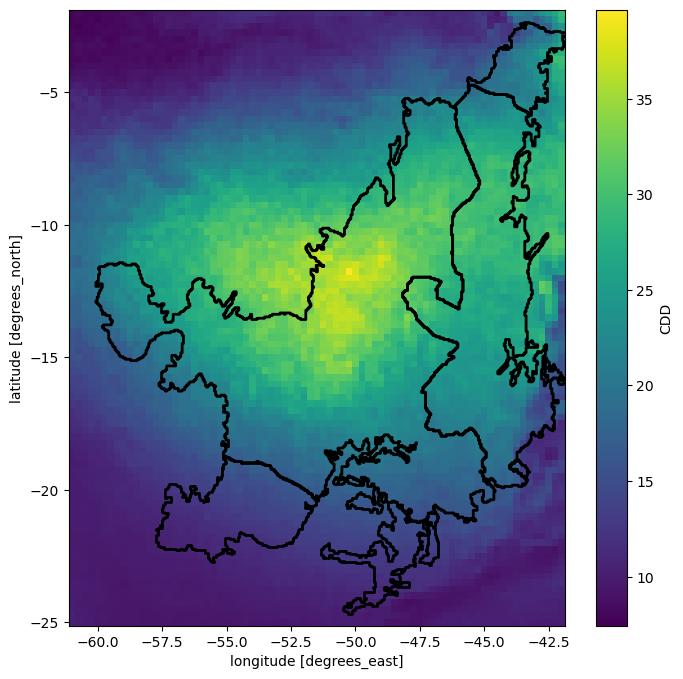

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
mm.plot(ax=ax)
regions.plot(ax=ax, color='none', edgecolor='black', linewidth=2)